In [2]:
import pandas as pd

df = pd.read_csv('/Users/Mr.BARASA/Library/CloudStorage/OneDrive-Personal/Desktop/ICDS/Adidas US Sales Datasets.csv')


In [3]:
df.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01/01/2020  Northeast  New York  New York   
1  Foot Locker      1185732   02/01/2020  Northeast  New York  New York   
2  Foot Locker      1185732   03/01/2020  Northeast  New York  New York   
3  Foot Locker      1185732   04/01/2020  Northeast  New York  New York   
4  Foot Locker      1185732   05/01/2020  Northeast  New York  New York   

                     Product Price per Unit Units Sold Total Sales  \
0      Men's Street Footwear        $50.00       1,200   $600,000    
1    Men's Athletic Footwear        $50.00       1,000   $500,000    
2    Women's Street Footwear        $40.00       1,000   $400,000    
3  Women's Athletic Footwear        $45.00         850   $382,500    
4              Men's Apparel        $60.00         900   $540,000    

  Operating Profit Operating Margin Sales Method  
0        $300,000               50%     In-store  
1        $150,000               30%     In-store  
2        $140,000               35%     In-store  
3        $133,875               35%     In-store  
4        $162,000               30%     In-store

1. Data Cleaning and Preparation:
Handle Missing Values: Check for missing values in your dataframe df and decide how to handle them (e.g., imputation, removal).

In [4]:
df.isnull().sum()  # Check for missing values
df.dropna()  # Remove rows with missing values (example)

Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   01/01/2020  Northeast       New York   
1     Foot Locker      1185732   02/01/2020  Northeast       New York   
2     Foot Locker      1185732   03/01/2020  Northeast       New York   
3     Foot Locker      1185732   04/01/2020  Northeast       New York   
4     Foot Locker      1185732   05/01/2020  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   24/01/2021  Northeast  New Hampshire   
9644  Foot Locker      1185732   24/01/2021  Northeast  New Hampshire   
9645  Foot Locker      1185732   22/02/2021  Northeast  New Hampshire   
9646  Foot Locker      1185732   22/02/2021  Northeast  New Hampshire   
9647  Foot Locker      1185732   22/02/2021  Northeast  New Hampshire   

            City                    Product Price per Unit Units Sold  \
0       New York      Men's Street Footwear        $50.00       1,200   
1       New York    Men's Athletic Footwear        $50.00       1,000   
2       New York    Women's Street Footwear        $40.00       1,000   
3       New York  Women's Athletic Footwear        $45.00         850   
4       New York              Men's Apparel        $60.00         900   
...          ...                        ...            ...        ...   
9643  Manchester              Men's Apparel        $50.00          64   
9644  Manchester            Women's Apparel        $41.00         105   
9645  Manchester      Men's Street Footwear        $41.00         184   
9646  Manchester    Men's Athletic Footwear        $42.00          70   
9647  Manchester    Women's Street Footwear        $29.00          83   

     Total Sales Operating Profit Operating Margin Sales Method  
0      $600,000         $300,000               50%     In-store  
1      $500,000         $150,000               30%     In-store  
2      $400,000         $140,000               35%     In-store  
3      $382,500         $133,875               35%     In-store  
4      $540,000         $162,000               30%     In-store  
...          ...              ...              ...          ...  
9643     $3,200             $896               28%       Outlet  
9644     $4,305           $1,378               32%       Outlet  
9645     $7,544           $2,791               37%       Outlet  
9646     $2,940           $1,235               42%       Outlet  
9647     $2,407             $650               27%       Outlet  

[9648 rows x 13 columns]

Convert Data Types: Ensure that columns have the appropriate data types (e.g., dates, numerical values)

2. Exploratory Data Analysis (EDA) and Visualization:
Descriptive Statistics: Calculate basic statistics (mean, median, standard deviation, etc.) for numerical columns.

  


In [5]:
df.describe()

Retailer ID
count  9.648000e+03
mean   1.173850e+06
std    2.636038e+04
min    1.128299e+06
25%    1.185732e+06
50%    1.185732e+06
75%    1.185732e+06
max    1.197831e+06

In [6]:
!pip install plotly==5.13.1

In [7]:
import plotly

In [8]:
import plotly.express as px

1. Sales by Retailer:

2. Sales Trend Over Time:

In [9]:
# Assuming 'Invoice Date' is already a datetime column
df_sorted = df.sort_values(by='Invoice Date')
fig = px.line(df_sorted, x='Invoice Date', y='Total Sales', title='Sales Trend Over Time')
fig.show()

3. Sales Distribution by State:

In [10]:
fig = px.choropleth(df,
                    locations='State',
                    locationmode="USA-states",
                    color='Total Sales',
                    scope="usa",
                    title='Sales Distribution by State')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



4. Sales by Product and Region:

In [11]:
# Clean the 'Total Sales' column to remove non-numeric characters
df['Total Sales'] = df['Total Sales'].str.replace('[\$,]', '', regex=True).astype(float)

fig = px.sunburst(df, path=['Region', 'Product'], values='Total Sales', title='Sales by Product and Region')
fig.show()

<>:2: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

/var/folders/_s/qv4_227j5qdbtdr3gprpz2bh0000gn/T/ipykernel_1814/3648226742.py:2: SyntaxWarning:

invalid escape sequence '\$'



In [12]:
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum().reset_index()
fig = px.bar(profit_by_method, x='Sales Method', y='Operating Profit', title='Most Profit by Sales Method')
fig.show()

In [13]:
import plotly.express as px
products_sold = df.groupby('Product')['Units Sold'].sum().reset_index()
fig = px.pie(products_sold, values='Units Sold', names='Product', title='Products Sold')
fig.show()

In [14]:
import plotly.express as px
import pandas as pd

profit_by_factors = df.groupby(['Sales Method', 'Product', 'Region'])['Operating Profit'].sum().reset_index()

# Convert 'Operating Profit' to numeric type, handling errors
profit_by_factors['Operating Profit'] = pd.to_numeric(profit_by_factors['Operating Profit'], errors='coerce')

# Fill NaN values in 'Operating Profit' with 0 - This will allow the scatter plot to render
profit_by_factors['Operating Profit'] = profit_by_factors['Operating Profit'].fillna(0)

fig = px.scatter(profit_by_factors,
                 x='Sales Method',
                 y='Product',
                 size='Operating Profit',
                 color='Region',
                 title='Profit Optimization by Sales Method, Product, and Region')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



3. Statistical Analysis:
Hypothesis Testing: Conduct hypothesis tests to answer specific questions about your data (e.g., are sales significantly different between regions?).

2. Choose a Test:
Since you are comparing profit (a continuous variable) between multiple sales methods (a categorical variable), you can use a one-way ANOVA test.

3. Conduct the Test:

In [15]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


F-statistic: 722.5508476907061
P-value: 3.943909854063381e-293
Reject the null hypothesis: There is a significant difference between the groups.


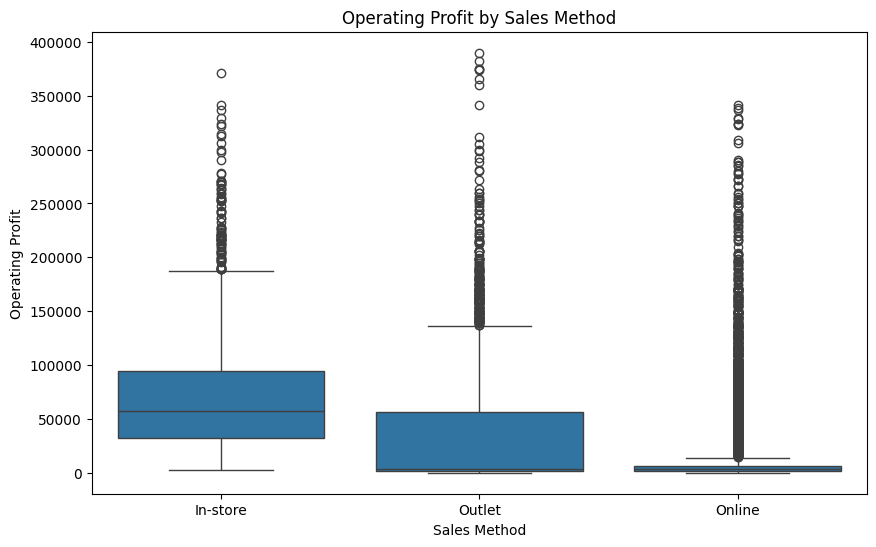

In [17]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'Sales Method': ['In-store', 'Online', 'Outlet', 'In-store', 'Online', 'Outlet'],
#     'Operating Profit': ['$100', '$200', '$150', '$120', '$210', '$160']
# })

# Ensure all values in 'Operating Profit' are strings
df['Operating Profit'] = df['Operating Profit'].astype(str)

# Remove dollar signs and commas, then convert to numeric
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '').str.replace(',', '').astype(float)

# Now you can fill missing values with the mean
df['Operating Profit'] = df['Operating Profit'].fillna(df['Operating Profit'].mean())

# Group data by 'Sales Method'
groups = [group['Operating Profit'].values for name, group in df.groupby('Sales Method')]

# Conduct ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

# Visualization using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales Method', y='Operating Profit', data=df)
plt.title('Operating Profit by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Operating Profit')
plt.show()

4. Interpret Results:
If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that there is a significant difference in profit between sales methods.
If the p-value is greater than your significance level, you fail to reject the null hypothesis and conclude that there is no significant evidence of a difference in profit between sales methods.

The F-statistic is a value calculated in an Analysis of Variance (ANOVA) test. It represents the ratio of the variance between groups to the variance within groups.
In simpler terms:
A larger F-statistic indicates that the differences between group means are more significant compared to the variation within each group. This suggests that the factor you are testing (e.g., sales method) has a stronger effect on the outcome (e.g., profit).
A smaller F-statistic suggests that the differences between group means are less pronounced compared to the variation within each group. This indicates that the factor you are testing may not have a strong effect on the outcome.
Interpretation:
The F-statistic alone doesn't tell you whether to reject or accept the null hypothesis. You need to compare it to a critical value from the F-distribution or look at the associated p-value to make a decision.

1. Sales Forecasting:
Problem: Predict future sales for different products, regions, or sales methods.
Possible Models: Time series forecasting models (ARIMA, Prophet), regression models (Linear Regression, Random Forest).
Business Value: Optimize inventory management, production planning, and pricing strategies.

Sales Forecasting: Problem: Predict future sales for sales methods. for Adidas dataset

In [18]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Mean Squared Error for In-store: 10051607979.758158
Mean Absolute Error for In-store: 73806.72423026757
R-squared for In-store: 0.5093261619840608


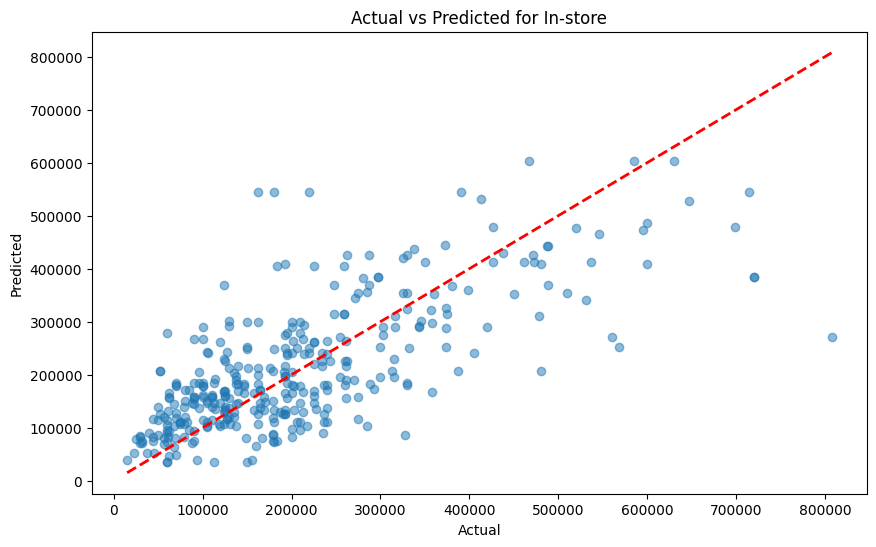

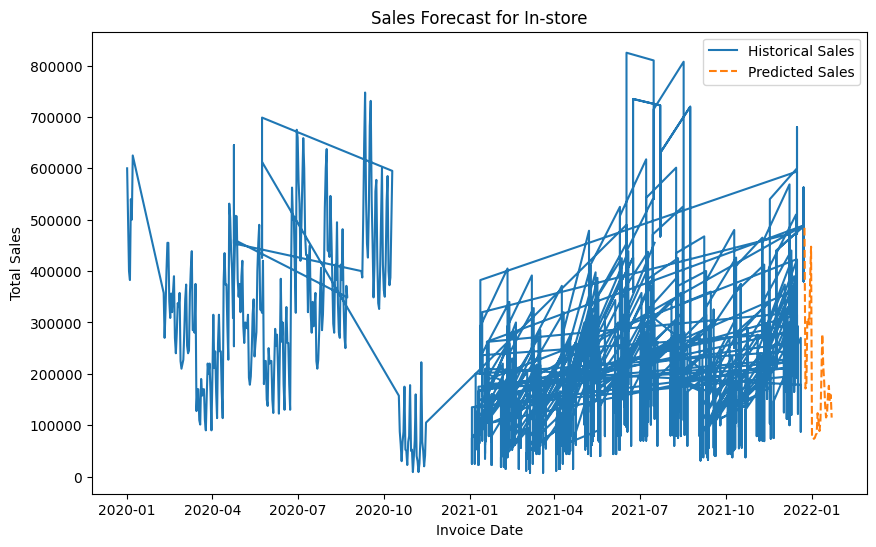

Mean Squared Error for Outlet: 32578844414.43071
Mean Absolute Error for Outlet: 126222.71169851666
R-squared for Outlet: -0.29373375357076137


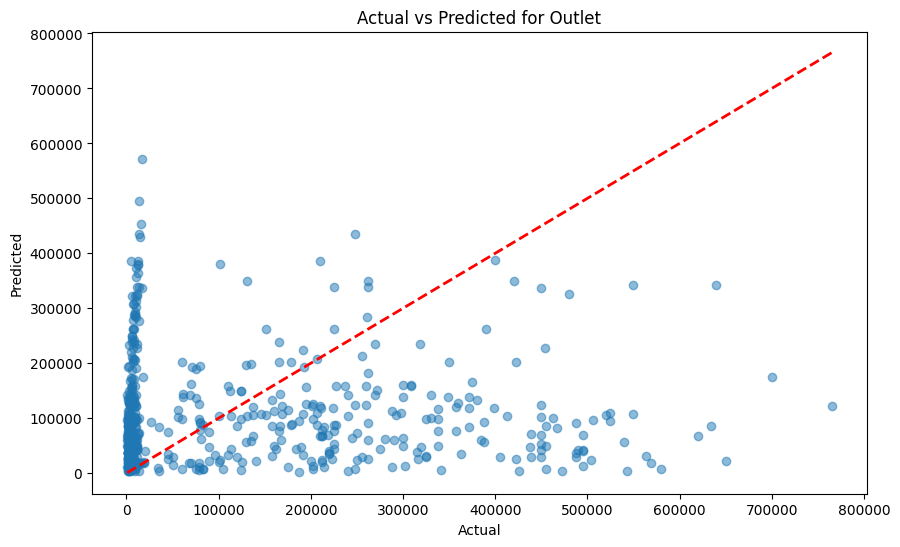

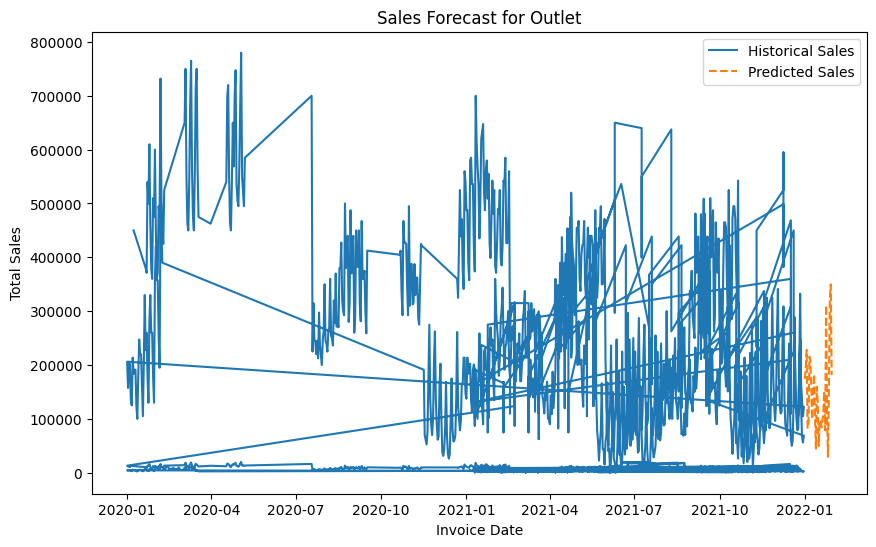

Mean Squared Error for Online: 10828099709.878063
Mean Absolute Error for Online: 59599.229378298456
R-squared for Online: 0.17392490535916982


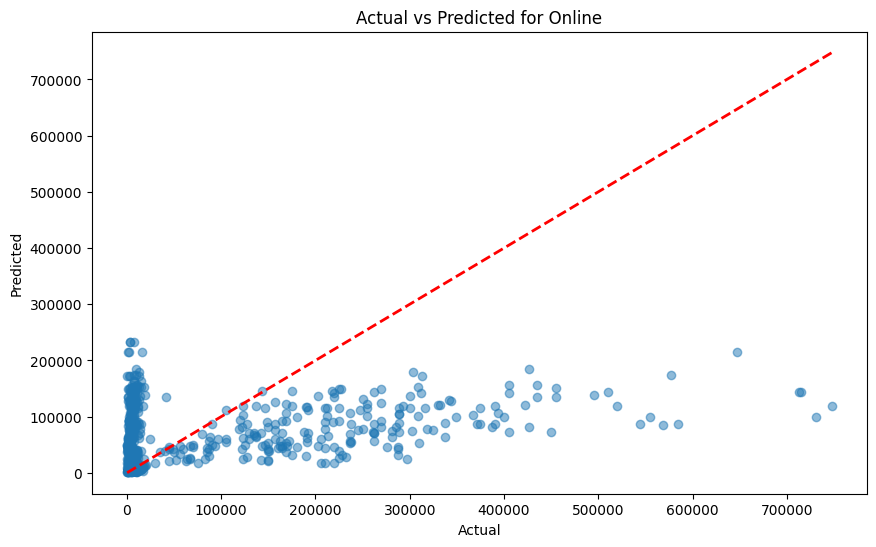

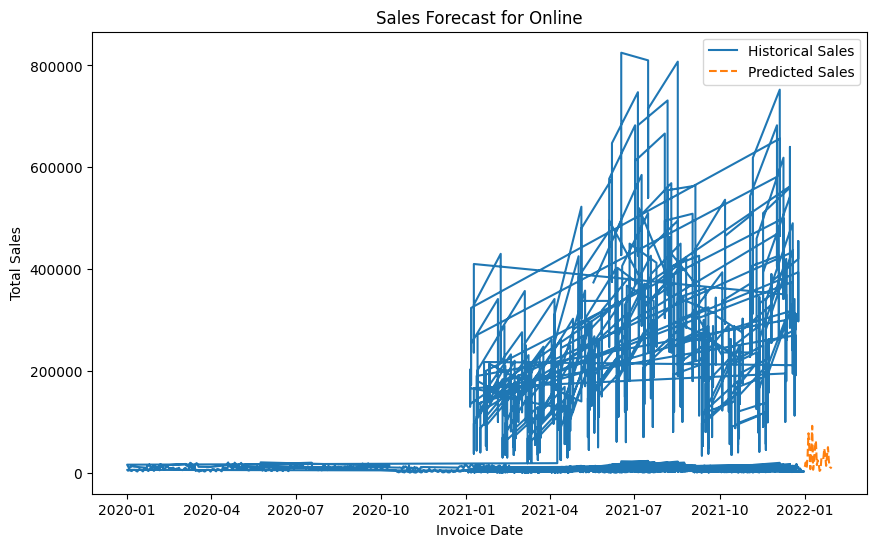

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample data preparation (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'Invoice Date': pd.date_range(start='2021-01-01', periods=100, freq='D'),
#     'Sales Method': ['In-store', 'Online', 'Outlet'] * 100,
#     'Total Sales': [100, 200, 150] * 100
# })

# Ensure the 'Invoice Date' column is in datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format="%d/%m/%Y")

# Function to train and forecast using Random Forest
def forecast_sales(df, sales_method, periods=30):
    # Filter data for the specific sales method
    df_method = df[df['Sales Method'] == sales_method]
    
    # Prepare features and target
    X = df_method[['Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']]
    y = df_method['Total Sales']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error for {sales_method}: {mse}")
    print(f"Mean Absolute Error for {sales_method}: {mae}")
    print(f"R-squared for {sales_method}: {r2}")
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {sales_method}')
    plt.show()
    
    # Create a dataframe for future dates
    last_date = df_method['Invoice Date'].max()
    future_dates = pd.date_range(start=last_date, periods=periods + 1)[1:]  # Exclude the start date
    future_df = pd.DataFrame({
        'Invoice Date': future_dates,
        'Year': future_dates.year,
        'Month': future_dates.month,
        'Day': future_dates.day,
        'DayOfWeek': future_dates.dayofweek,
        'WeekOfYear': future_dates.isocalendar().week
    })
    
    # Predict future sales
    future_X = future_df[['Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']]
    future_df['Total Sales'] = model.predict(future_X)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_method['Invoice Date'], df_method['Total Sales'], label='Historical Sales')
    plt.plot(future_df['Invoice Date'], future_df['Total Sales'], label='Predicted Sales', linestyle='--')
    plt.title(f'Sales Forecast for {sales_method}')
    plt.xlabel('Invoice Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()
    
    return future_df

# Forecast for each sales method
# Ensure the 'Year', 'Month', 'Day', 'DayOfWeek', and 'WeekOfYear' columns are present in the DataFrame
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day
df['DayOfWeek'] = df['Invoice Date'].dt.dayofweek
df['WeekOfYear'] = df['Invoice Date'].dt.isocalendar().week

# Call the forecast_sales() function
forecasts = {}
sales_methods = df['Sales Method'].unique()
for method in sales_methods:
    forecasts[method] = forecast_sales(df, method)


In [20]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/Mr.BARASA/Library/CloudStorage/OneDrive-Personal/Desktop/ICDS/Adidas US Sales Datasets.csv')

# Replace non-numeric values with NaN in the 'Total Sales' column
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')

# Convert the 'Total Sales' column to float
df['Total Sales'] = df['Total Sales'].astype(float)

# Optionally, fill NaN values with a specific value, e.g., 0
df['Total Sales'].fillna(0, inplace=True)

print(df.head())

      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01/01/2020  Northeast  New York  New York   
1  Foot Locker      1185732   02/01/2020  Northeast  New York  New York   
2  Foot Locker      1185732   03/01/2020  Northeast  New York  New York   
3  Foot Locker      1185732   04/01/2020  Northeast  New York  New York   
4  Foot Locker      1185732   05/01/2020  Northeast  New York  New York   

                     Product Price per Unit Units Sold  Total Sales  \
0      Men's Street Footwear        $50.00       1,200          0.0   
1    Men's Athletic Footwear        $50.00       1,000          0.0   
2    Women's Street Footwear        $40.00       1,000          0.0   
3  Women's Athletic Footwear        $45.00         850          0.0   
4              Men's Apparel        $60.00         900          0.0   

  Operating Profit Operating Margin Sales Method  
0        $300,000               50%     In-store  
1        $150,000   

/var/folders/_s/qv4_227j5qdbtdr3gprpz2bh0000gn/T/ipykernel_1814/2910117913.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [21]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [22]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib
import os

# Get the absolute path of the current notebook
notebook_path = os.path.abspath('Adidas_Sales_Visualisation,ML_&_statistics.ipynb')

# Get the directory path of the notebook
notebook_dir = os.path.dirname(notebook_path)

# Specify the relative path to the 'model.pkl' file
model_path = os.path.join(notebook_dir, 'model.pkl')

# Load the trained model
model = joblib.load(model_path)
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Adidas Sales Prediction"),
    dcc.Input(id='input-days-since', type='number', placeholder='Days Since'),
    dcc.Dropdown(
        id='input-sales-method',
        options=[
            {'label': 'Online', 'value': 'Online'},
            {'label': 'Outlet', 'value': 'Outlet'},
            {'label': 'Instore', 'value': 'Instore'},
        ],
        placeholder='Select Sales Method'
    ),
    html.Button('Predict', id='predict-button'),
    html.Div(id='output-prediction')
])

@app.callback(
    Output('output-prediction', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('input-days-since', 'value'),
     State('input-sales-method', 'value')]
)
def predict_sales(n_clicks, days_since, sales_method):
    if n_clicks is None:
        return ''
    
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Days Since': [days_since],
        f'Sales Method_{sales_method}': [1]
    })
    
    # Ensure all columns are present
    all_columns = pd.DataFrame(columns=model.feature_names_in_)
    input_data = pd.concat([all_columns, input_data], axis=0, ignore_index=True).fillna(0).infer_objects(copy=False)
    
    # Predict sales
    prediction = model.predict(input_data)[0]
    return f'Predicted Sales: ${prediction:.2f}'

if __name__ == '__main__':
    app.run_server(debug=True)

In [23]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib
import plotly.graph_objs as go

# Load the trained model
model = joblib.load('model.pkl')

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Adidas Sales Prediction"),
    dcc.Input(id='input-days-since', type='number', placeholder='Days Since'),
    dcc.Dropdown(
        id='input-sales-method',
        options=[
            {'label': 'Online', 'value': 'Online'},
            {'label': 'Outlet', 'value': 'Outlet'},
            {'label': 'Instore', 'value': 'Instore'},
        ],
        placeholder='Select Sales Method'
    ),
    html.Button('Predict', id='predict-button'),
    dcc.Graph(id='output-prediction-graph')
])

@app.callback(
    Output('output-prediction-graph', 'figure'),
    [Input('predict-button', 'n_clicks')],
    [State('input-days-since', 'value'),
     State('input-sales-method', 'value')]
)
def predict_sales(n_clicks, days_since, sales_method):
    if n_clicks is None:
        return go.Figure()
    
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Days Since': [days_since],
        f'Sales Method_{sales_method}': [1]
    })
    
    # Ensure all columns are present
    all_columns = pd.DataFrame(columns=model.feature_names_in_)
    input_data = pd.concat([all_columns, input_data], axis=0, ignore_index=True).fillna(0).infer_objects(copy=False)
    
    # Predict sales
    prediction = model.predict(input_data)[0]
    
    # Create a bar chart for the prediction
    figure = go.Figure(data=[
        go.Bar(name='Predicted Sales', x=['Prediction'], y=[prediction])
    ])
    
    figure.update_layout(title='Predicted Sales', xaxis_title='Prediction', yaxis_title='Sales ($)')
    
    return figure

if __name__ == '__main__':
    app.run_server(debug=True)

/var/folders/_s/qv4_227j5qdbtdr3gprpz2bh0000gn/T/ipykernel_1814/804219661.py:48: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/_s/qv4_227j5qdbtdr3gprpz2bh0000gn/T/ipykernel_1814/804219661.py:48: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[23], line 47, in predict_sales(
    n_clicks=2,
    days_since=10,
    sales_method='Instore'
)
     41 input_data = pd.DataFrame({
     42     'Days Since': [days_since],
     43     f'Sales Method_{sales_method}': [1]
     44 })
     46 # Ensure all columns are present
---> 47 all_columns = pd.DataFrame(columns=model.feature_names_in_)
        pd = <module 'pandas' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/__init__.py'>
        model = RandomForestRegressor(random_state=42)
     48 input_data = pd.concat([all_columns, input_data], axis=0, ignore_index=True).fillna(0).infer_objects(copy=False)
     50 # Predict sales

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'



In [24]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [26]:
import os

# Specify the file path and content
file_path = 'Procfile'
file_content = 'web: gunicorn app:server'

# Write the content to the file
with open(file_path, 'w') as file:
    file.write(file_content)

# Print a confirmation message
print(f"Procfile created at {os.path.abspath(file_path)}")

Procfile created at /Users/Mr.BARASA/Library/CloudStorage/OneDrive-Personal/Desktop/ICDS PROJECT/Procfile


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv('/Users/Mr.BARASA/Library/CloudStorage/OneDrive-Personal/Desktop/ICDS/Adidas US Sales Datasets.csv')

# Clean the 'Total Sales' column
data['Total Sales'] = data['Total Sales'].str.replace('[\$,]', '', regex=True).astype(float)

# Preprocess the data
X = data.drop('Total Sales', axis=1)
y = data['Total Sales']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

# Save the model
joblib.dump(pipeline, 'sales_prediction_model.pkl')
print("Model saved as 'sales_prediction_model.pkl'")

<>:14: SyntaxWarning:

invalid escape sequence '\$'

<>:14: SyntaxWarning:

invalid escape sequence '\$'

/var/folders/_s/qv4_227j5qdbtdr3gprpz2bh0000gn/T/ipykernel_1814/2858883452.py:14: SyntaxWarning:

invalid escape sequence '\$'



MAE: 19970.324621761654
MSE: 2497938214.056704
R2: 0.8775323212717422
Model saved as 'sales_prediction_model.pkl'


In [41]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib

# Load the trained model
pipeline = joblib.load('sales_prediction_model.pkl')

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Adidas Sales Prediction"),
    
    # Add input fields for each feature
    html.Div([
        html.Label("Price per Unit"),
        dcc.Input(id='price_per_unit', type='number', value=''),
    ]),
    html.Div([
        html.Label("Region"),
        dcc.Input(id='region', type='text', value=''),
    ]),
    html.Div([
        html.Label("Product"),
        dcc.Input(id='product', type='text', value=''),
    ]),
    html.Div([
        html.Label("Operating Margin"),
        dcc.Input(id='operating_margin', type='number', value=''),
    ]),
    html.Div([
        html.Label("Operating Profit"),
        dcc.Input(id='operating_profit', type='number', value=''),
    ]),
    html.Div([
        html.Label("State"),
        dcc.Input(id='state', type='text', value=''),
    ]),
    html.Div([
        html.Label("Invoice Date"),
        dcc.Input(id='invoice_date', type='text', value=''),
    ]),
    html.Div([
        html.Label("Retailer"),
        dcc.Input(id='retailer', type='text', value=''),
    ]),
    html.Div([
        html.Label("City"),
        dcc.Input(id='city', type='text', value=''),
    ]),
    html.Div([
        html.Label("Retailer ID"),
        dcc.Input(id='retailer_id', type='text', value=''),
    ]),
    html.Div([
        html.Label("Units Sold"),
        dcc.Input(id='units_sold', type='number', value=''),
    ]),
    html.Div([
        html.Label("Sales Method"),
        dcc.Input(id='sales_method', type='text', value=''),
    ]),
    
    html.Button('Predict', id='predict-button', n_clicks=0),
    
    html.Div(id='prediction-output')
])

@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('price_per_unit', 'value'),
     State('region', 'value'),
     State('product', 'value'),
     State('operating_margin', 'value'),
     State('operating_profit', 'value'),
     State('state', 'value'),
     State('invoice_date', 'value'),
     State('retailer', 'value'),
     State('city', 'value'),
     State('retailer_id', 'value'),
     State('units_sold', 'value'),
     State('sales_method', 'value')]
)
def predict_sales(n_clicks, price_per_unit, region, product, operating_margin, operating_profit, state, invoice_date, retailer, city, retailer_id, units_sold, sales_method):
    if n_clicks > 0:
        # Create a DataFrame for the input features
        input_data = pd.DataFrame({
            'Price per Unit': [price_per_unit],
            'Region': [region],
            'Product': [product],
            'Operating Margin': [operating_margin],
            'Operating Profit': [operating_profit],
            'State': [state],
            'Invoice Date': [invoice_date],
            'Retailer': [retailer],
            'City': [city],
            'Retailer ID': [retailer_id],
            'Units Sold': [units_sold],
            'Sales Method': [sales_method]
        })
        
        # Make prediction
        prediction = pipeline.predict(input_data)
        
        return f'Predicted Sales: ${prediction[0]:,.2f}'
    return ''

if __name__ == '__main__':
    app.run_server(debug=True)

In [44]:
import joblib

# Assuming `pipeline` is your trained model
joblib.dump(pipeline, 'sales_prediction_model_compressed.pkl', compress=('xz', 3))

['sales_prediction_model_compressed.pkl']

In [45]:
import joblib

# Load the compressed model
pipeline = joblib.load('sales_prediction_model_compressed.pkl')

In [46]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib

# Load the compressed model
pipeline = joblib.load('sales_prediction_model_compressed.pkl')

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Adidas Sales Prediction"),
    
    # Add input fields for each feature
    html.Div([
        html.Label("Price per Unit"),
        dcc.Input(id='price_per_unit', type='number', value=''),
    ]),
    html.Div([
        html.Label("Region"),
        dcc.Input(id='region', type='text', value=''),
    ]),
    html.Div([
        html.Label("Product"),
        dcc.Input(id='product', type='text', value=''),
    ]),
    html.Div([
        html.Label("Operating Margin"),
        dcc.Input(id='operating_margin', type='number', value=''),
    ]),
    html.Div([
        html.Label("Operating Profit"),
        dcc.Input(id='operating_profit', type='number', value=''),
    ]),
    html.Div([
        html.Label("State"),
        dcc.Input(id='state', type='text', value=''),
    ]),
    html.Div([
        html.Label("Invoice Date"),
        dcc.Input(id='invoice_date', type='text', value=''),
    ]),
    html.Div([
        html.Label("Retailer"),
        dcc.Input(id='retailer', type='text', value=''),
    ]),
    html.Div([
        html.Label("City"),
        dcc.Input(id='city', type='text', value=''),
    ]),
    html.Div([
        html.Label("Retailer ID"),
        dcc.Input(id='retailer_id', type='text', value=''),
    ]),
    html.Div([
        html.Label("Units Sold"),
        dcc.Input(id='units_sold', type='number', value=''),
    ]),
    html.Div([
        html.Label("Sales Method"),
        dcc.Input(id='sales_method', type='text', value=''),
    ]),
    
    html.Button('Predict', id='predict-button', n_clicks=0),
    
    html.Div(id='prediction-output')
])

@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('price_per_unit', 'value'),
     State('region', 'value'),
     State('product', 'value'),
     State('operating_margin', 'value'),
     State('operating_profit', 'value'),
     State('state', 'value'),
     State('invoice_date', 'value'),
     State('retailer', 'value'),
     State('city', 'value'),
     State('retailer_id', 'value'),
     State('units_sold', 'value'),
     State('sales_method', 'value')]
)
def predict_sales(n_clicks, price_per_unit, region, product, operating_margin, operating_profit, state, invoice_date, retailer, city, retailer_id, units_sold, sales_method):
    if n_clicks > 0:
        # Create a DataFrame for the input features
        input_data = pd.DataFrame({
            'Price per Unit': [price_per_unit],
            'Region': [region],
            'Product': [product],
            'Operating Margin': [operating_margin],
            'Operating Profit': [operating_profit],
            'State': [state],
            'Invoice Date': [invoice_date],
            'Retailer': [retailer],
            'City': [city],
            'Retailer ID': [retailer_id],
            'Units Sold': [units_sold],
            'Sales Method': [sales_method]
        })
        
        # Make prediction
        prediction = pipeline.predict(input_data)
        
        return f'Predicted Sales: ${prediction[0]:,.2f}'
    return ''

if __name__ == '__main__':
    app.run_server(debug=True)

In [52]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib
import os
import os

model_path = os.path.join('models', 'sales_prediction_model.pkl')

if not os.path.exists(model_path):
    model_path = os.path.join('/path/to/models', 'sales_prediction_model.pkl')
    # or provide the correct path to the file

model_path = '/Users/Mr.BARASA/Library/CloudStorage/OneDrive-Personal/Desktop/ICDS PROJECT/sales_prediction_model.pkl'
pipeline = joblib.load(model_path)
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Adidas Sales Prediction"),
    
    # Add input fields for each feature
    html.Div([
        html.Label("Price per Unit"),
        dcc.Input(id='price_per_unit', type='number', value=''),
    ]),
    html.Div([
        html.Label("Region"),
        dcc.Input(id='region', type='text', value=''),
    ]),
    html.Div([
        html.Label("Product"),
        dcc.Input(id='product', type='text', value=''),
    ]),
    html.Div([
        html.Label("Operating Margin"),
        dcc.Input(id='operating_margin', type='number', value=''),
    ]),
    html.Div([
        html.Label("Operating Profit"),
        dcc.Input(id='operating_profit', type='number', value=''),
    ]),
    html.Div([
        html.Label("State"),
        dcc.Input(id='state', type='text', value=''),
    ]),
    html.Div([
        html.Label("Invoice Date"),
        dcc.Input(id='invoice_date', type='text', value=''),
    ]),
    html.Div([
        html.Label("Retailer"),
        dcc.Input(id='retailer', type='text', value=''),
    ]),
    html.Div([
        html.Label("City"),
        dcc.Input(id='city', type='text', value=''),
    ]),
    html.Div([
        html.Label("Retailer ID"),
        dcc.Input(id='retailer_id', type='text', value=''),
    ]),
    html.Div([
        html.Label("Units Sold"),
        dcc.Input(id='units_sold', type='number', value=''),
    ]),
    html.Div([
        html.Label("Sales Method"),
        dcc.Input(id='sales_method', type='text', value=''),
    ]),
    
    html.Button('Predict', id='predict-button', n_clicks=0),
    
    html.Div(id='prediction-output')
])

@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('price_per_unit', 'value'),
     State('region', 'value'),
     State('product', 'value'),
     State('operating_margin', 'value'),
     State('operating_profit', 'value'),
     State('state', 'value'),
     State('invoice_date', 'value'),
     State('retailer', 'value'),
     State('city', 'value'),
     State('retailer_id', 'value'),
     State('units_sold', 'value'),
     State('sales_method', 'value')]
)
def predict_sales(n_clicks, price_per_unit, region, product, operating_margin, operating_profit, state, invoice_date, retailer, city, retailer_id, units_sold, sales_method):
    if n_clicks > 0:
        # Create a DataFrame for the input features
        input_data = pd.DataFrame({
            'Price per Unit': [price_per_unit],
            'Region': [region],
            'Product': [product],
            'Operating Margin': [operating_margin],
            'Operating Profit': [operating_profit],
            'State': [state],
            'Invoice Date': [invoice_date],
            'Retailer': [retailer],
            'City': [city],
            'Retailer ID': [retailer_id],
            'Units Sold': [units_sold],
            'Sales Method': [sales_method]
        })
        
        # Make prediction
        prediction = pipeline.predict(input_data)
        
        return f'Predicted Sales: ${prediction[0]:,.2f}'
    return ''

if __name__ == '__main__':
    app.run_server(debug=True)